In [349]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
%matplotlib inline

In [350]:
train = pd.read_csv("C://Users//Rachit//Desktop//great learning - data science engineering//machine learning//competition//Titanic//titanic//train.csv")
test = pd.read_csv("C://Users//Rachit//Desktop//great learning - data science engineering//machine learning//competition//Titanic//titanic//test.csv")

In [351]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [352]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis

In [354]:
#checking the mull values 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [355]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

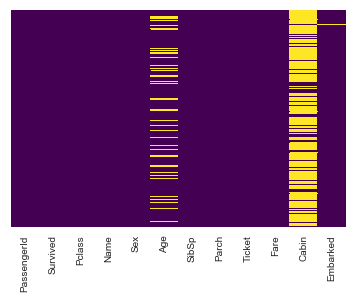

In [356]:
# plotting a heat map for the same null values

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

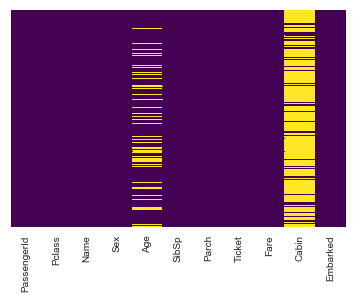

In [357]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Fairly large number of null values are present, so going forward we need to impute null values.
### Lets continue visualizing some data 

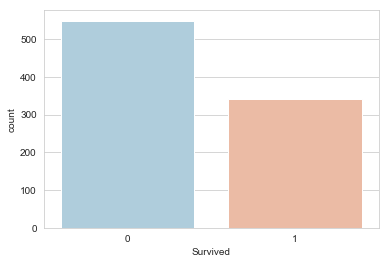

In [358]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

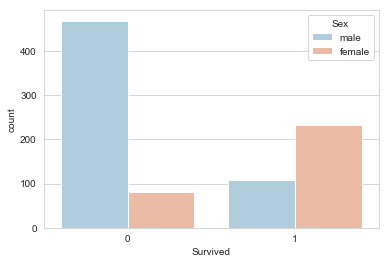

In [359]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

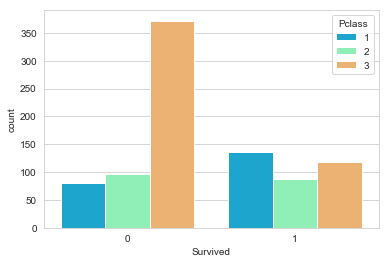

In [360]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

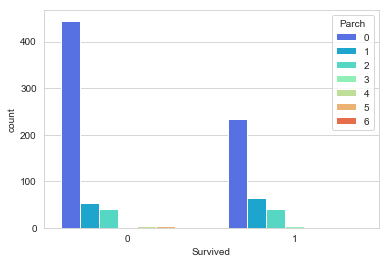

In [361]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Parch',data=train,palette='rainbow')

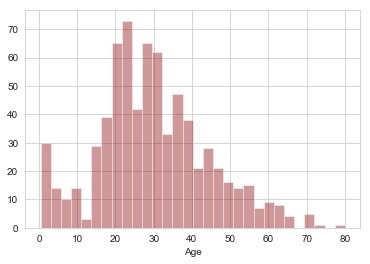

In [362]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

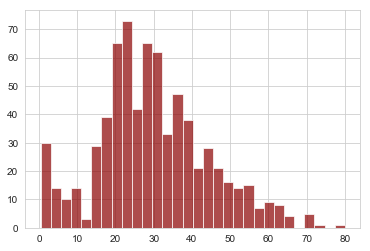

In [363]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

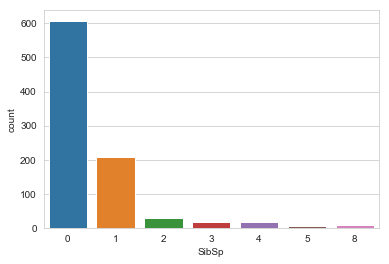

In [364]:
sns.countplot(x='SibSp',data=train)

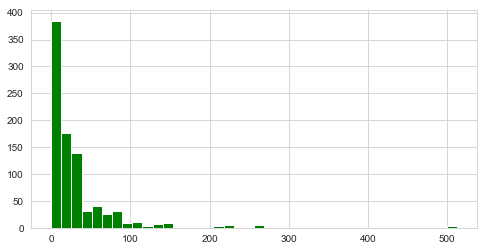

In [365]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

# Data Cleaning Stage:

### Lets check some values of the missing columns. We can use value_counts() command to get the values 

In [366]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [367]:
train.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [368]:
train.Cabin.value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
E101               3
C22 C26            3
F2                 3
F33                3
D                  3
B58 B60            2
D26                2
C124               2
C78                2
C92                2
D33                2
B77                2
D20                2
C2                 2
B57 B59 B63 B66    2
F G73              2
F4                 2
C93                2
E24                2
D17                2
C123               2
E8                 2
C83                2
C65                2
B35                2
C126               2
E67                2
                  ..
C91                1
E40                1
F G63              1
B3                 1
B42                1
B71                1
C128               1
C7                 1
D30                1
D50                1
C103               1
E38                1
A26                1
C54                1
C45                1
C104               1
B86          

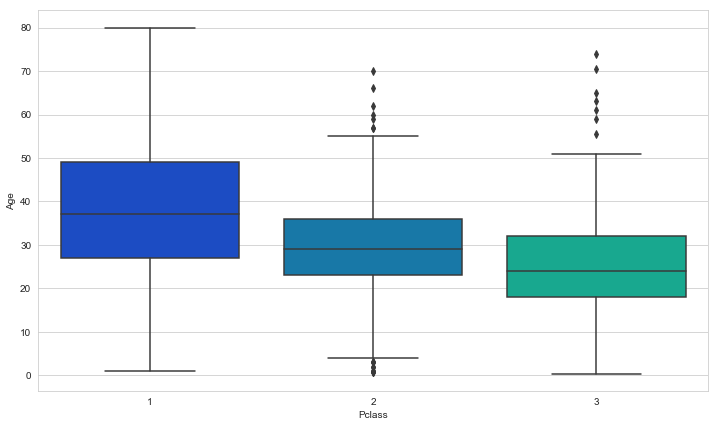

In [369]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

### We can see the wealthier passengers in the higher classes tend to be older, which makes sense. Most of the people in class 2 and 3 are on the younger as compared to the class 1.

In [370]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### We can see the average age is around 30 and maximum count with age of people is 30 as well so we will impute 30.

In [371]:
train.Age.fillna(value = 30, inplace = True)

In [372]:
test.Age.fillna(value = 30, inplace = True)

### Checking the heatmap again  after dropping cabin and filling Age

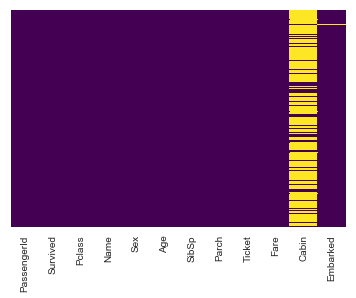

In [373]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# There are too many null values in cabin its better to drop this column as it will effect our machine learning model

In [374]:
train.drop("Cabin", inplace = True, axis = 1)

In [375]:
test.drop("Cabin", inplace = True, axis = 1)

In [377]:
train.Embarked.fillna(value = "S", inplace = True)

# Checking the heat map for final time

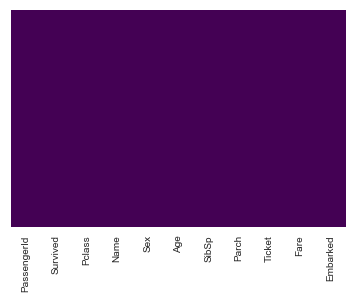

In [331]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [378]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [379]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [380]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Handling the categorical variables

In [381]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [382]:
le = LabelEncoder()

In [383]:
train["Sex"] = le.fit_transform(train.Sex)
test["Sex"] = le.fit_transform(test.Sex)

In [384]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [385]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S


In [386]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [387]:
train.drop(["Name"], inplace = True, axis = 1)

In [388]:
test.drop(["Name"], inplace = True, axis = 1)

In [389]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,0,35.0,1,0,113803,53.1000,S
4,5,0,3,1,35.0,0,0,373450,8.0500,S


In [390]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,1,34.5,0,0,330911,7.8292,Q
1,893,3,0,47.0,1,0,363272,7.0000,S
2,894,2,1,62.0,0,0,240276,9.6875,Q
3,895,3,1,27.0,0,0,315154,8.6625,S
4,896,3,0,22.0,1,1,3101298,12.2875,S


In [391]:
train.drop("PassengerId", axis = 1, inplace = True)
test.drop("PassengerId", axis =1, inplace = True)

In [392]:
train.drop(["Age","Ticket"], axis = 1, inplace = True)
test.drop(["Age","Ticket"], axis =1, inplace = True)

### Now our data is ready for model building 

### Building the model and using random forest as well as artificial neural net

In [393]:
#applying one hot encoding
newtrain = pd.get_dummies(train)
newtest = pd.get_dummies(test)

In [394]:
newtrain.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,1,0,7.2500,0,0,1
1,1,1,0,1,0,71.2833,1,0,0
2,1,3,0,0,0,7.9250,0,0,1
3,1,1,0,1,0,53.1000,0,0,1
4,0,3,1,0,0,8.0500,0,0,1


In [395]:
newtest.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,0,7.8292,0,1,0
1,3,0,1,0,7.0000,0,0,1
2,2,1,0,0,9.6875,0,1,0
3,3,1,0,0,8.6625,0,0,1
4,3,0,1,1,12.2875,0,0,1


In [396]:
newtrain.shape

(891, 9)

In [397]:
newtest.shape

(418, 8)

In [398]:
newtrain.isnull().sum()

Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [401]:
newtest.isnull().sum()

Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [123]:
newtest.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [400]:
newtest.fillna(value = 35.627, inplace = True)

In [402]:
#Initializing standard scaler
sc = StandardScaler()

In [403]:
scaledtrain=pd.DataFrame(sc.fit_transform(newtrain),columns=newtrain.columns)
scaledtest=pd.DataFrame(sc.fit_transform(newtest),columns=newtest.columns)

C:\Users\Rachit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Rachit\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Rachit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Rachit\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [404]:
scaledtrain.isnull().sum()

Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [405]:
scaledtest.isnull().sum()

Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [406]:
scaledtrain.shape

(891, 9)

In [407]:
scaledtrain.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,-0.789272,0.827377,0.737695,0.432793,-0.473674,-0.502445,-0.482043,-0.307562,0.615838
1,1.266990,-1.566107,-1.355574,0.432793,-0.473674,0.786845,2.074505,-0.307562,-1.623803
2,1.266990,0.827377,-1.355574,-0.474545,-0.473674,-0.488854,-0.482043,-0.307562,0.615838
3,1.266990,-1.566107,-1.355574,0.432793,-0.473674,0.420730,-0.482043,-0.307562,0.615838
4,-0.789272,0.827377,0.737695,-0.474545,-0.473674,-0.486337,-0.482043,-0.307562,0.615838


In [408]:
scaledtrain.drop("Parch", axis = 1, inplace = True)

In [409]:
scaledtest.shape

(418, 8)

In [247]:
#importing random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 6)

In [248]:
x = scaledtrain.drop("Survived", axis = 1)
y = train.Survived

In [249]:
#predicting the values
pred = rf.fit(x,y).predict(scaledtest)

C:\Users\Rachit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [250]:
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [204]:
solution = pd.read_csv("C://Users//Rachit//Desktop//great learning - data science engineering//machine learning//competition//Titanic//titanic//gender_submission.csv")

In [205]:
solution.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [207]:
survived = pd.DataFrame({"PassengerId": solution.PassengerId, 
                          "Survived": pred})

In [208]:
survived.to_csv("survived.csv", index = False)

In [410]:
import keras
from keras.models import Sequential
from keras.layers import Dense


In [411]:
#making the very first ANN
classifier = Sequential()


In [412]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))


In [413]:
# Adding the second hidden layer
classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))


In [414]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [415]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [416]:
# Fitting the ANN to the Training set
classifier.fit(x, y, batch_size = 10, epochs = 3000)


Epoch 1/3000
891/891 [==============================] - 0s 390us/step - loss: 0.6855 - acc: 0.6162
Epoch 2/3000
891/891 [==============================] - 0s 113us/step - loss: 0.6212 - acc: 0.6880
Epoch 3/3000
891/891 [==============================] - 0s 95us/step - loss: 0.5215 - acc: 0.8002
Epoch 4/3000
891/891 [==============================] - 0s 113us/step - loss: 0.4795 - acc: 0.7969
Epoch 5/3000
891/891 [==============================] - 0s 113us/step - loss: 0.4598 - acc: 0.7980
Epoch 6/3000
891/891 [==============================] - 0s 95us/step - loss: 0.4504 - acc: 0.8025
Epoch 7/3000
891/891 [==============================] - 0s 113us/step - loss: 0.4461 - acc: 0.8002
Epoch 8/3000
891/891 [==============================] - 0s 95us/step - loss: 0.4421 - acc: 0.8002
Epoch 9/3000
891/891 [==============================] - 0s 95us/step - loss: 0.4398 - acc: 0.8025
Epoch 10/3000
891/891 [==============================] - 0s 88us/step - loss: 0.4378 - acc: 0.8002
Epoch 11/3000


891/891 [==============================] - 0s 95us/step - loss: 0.4088 - acc: 0.8249
Epoch 166/3000
891/891 [==============================] - 0s 95us/step - loss: 0.4092 - acc: 0.8227
Epoch 167/3000
891/891 [==============================] - 0s 77us/step - loss: 0.4090 - acc: 0.8260
Epoch 168/3000
891/891 [==============================] - 0s 105us/step - loss: 0.4084 - acc: 0.8249
Epoch 169/3000
891/891 [==============================] - 0s 95us/step - loss: 0.4087 - acc: 0.8260
Epoch 170/3000
891/891 [==============================] - 0s 113us/step - loss: 0.4078 - acc: 0.8249
Epoch 171/3000
891/891 [==============================] - 0s 95us/step - loss: 0.4078 - acc: 0.8227
Epoch 172/3000
891/891 [==============================] - 0s 113us/step - loss: 0.4083 - acc: 0.8238
Epoch 173/3000
891/891 [==============================] - 0s 95us/step - loss: 0.4067 - acc: 0.8215
Epoch 174/3000
891/891 [==============================] - 0s 95us/step - loss: 0.4081 - acc: 0.8249
Epoch 175/30

891/891 [==============================] - 0s 113us/step - loss: 0.3997 - acc: 0.8249
Epoch 328/3000
891/891 [==============================] - 0s 113us/step - loss: 0.4007 - acc: 0.8283
Epoch 329/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3998 - acc: 0.8227
Epoch 330/3000
891/891 [==============================] - 0s 113us/step - loss: 0.4003 - acc: 0.8283
Epoch 331/3000
891/891 [==============================] - 0s 113us/step - loss: 0.4005 - acc: 0.8249
Epoch 332/3000
891/891 [==============================] - 0s 113us/step - loss: 0.4001 - acc: 0.8283
Epoch 333/3000
891/891 [==============================] - 0s 113us/step - loss: 0.4016 - acc: 0.8249
Epoch 334/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3996 - acc: 0.8294
Epoch 335/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3998 - acc: 0.8305
Epoch 336/3000
891/891 [==============================] - 0s 113us/step - loss: 0.4026 - acc: 0.8283
Epoch

891/891 [==============================] - 0s 130us/step - loss: 0.3960 - acc: 0.8249
Epoch 490/3000
891/891 [==============================] - 0s 137us/step - loss: 0.3939 - acc: 0.8373
Epoch 491/3000
891/891 [==============================] - 0s 148us/step - loss: 0.3957 - acc: 0.8294
Epoch 492/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3948 - acc: 0.8328
Epoch 493/3000
891/891 [==============================] - 0s 148us/step - loss: 0.3941 - acc: 0.8316
Epoch 494/3000
891/891 [==============================] - 0s 137us/step - loss: 0.3937 - acc: 0.8361
Epoch 495/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3952 - acc: 0.8350
Epoch 496/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3959 - acc: 0.8294
Epoch 497/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3963 - acc: 0.8305
Epoch 498/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3933 - acc: 0.8361
Epoch

891/891 [==============================] - 0s 130us/step - loss: 0.3895 - acc: 0.8361
Epoch 651/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3903 - acc: 0.8350
Epoch 652/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3909 - acc: 0.8283
Epoch 653/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3896 - acc: 0.8328
Epoch 654/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3887 - acc: 0.8350
Epoch 655/3000
891/891 [==============================] - 0s 120us/step - loss: 0.3917 - acc: 0.8305
Epoch 656/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3882 - acc: 0.8350
Epoch 657/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3886 - acc: 0.8339
Epoch 658/3000
891/891 [==============================] - 0s 112us/step - loss: 0.3903 - acc: 0.8305
Epoch 659/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3889 - acc: 0.8316
Epoch

891/891 [==============================] - 0s 130us/step - loss: 0.3873 - acc: 0.8339
Epoch 812/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3863 - acc: 0.8361
Epoch 813/3000
891/891 [==============================] - 0s 148us/step - loss: 0.3874 - acc: 0.8350
Epoch 814/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3859 - acc: 0.8361
Epoch 815/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3879 - acc: 0.8328
Epoch 816/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3873 - acc: 0.8249
Epoch 817/3000
891/891 [==============================] - 0s 137us/step - loss: 0.3873 - acc: 0.8350
Epoch 818/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3863 - acc: 0.8361
Epoch 819/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3862 - acc: 0.8350
Epoch 820/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3882 - acc: 0.8339
Epoch

891/891 [==============================] - 0s 113us/step - loss: 0.3895 - acc: 0.8272
Epoch 974/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3874 - acc: 0.8339
Epoch 975/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3861 - acc: 0.8283
Epoch 976/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3861 - acc: 0.8316
Epoch 977/3000
891/891 [==============================] - 0s 155us/step - loss: 0.3869 - acc: 0.8316
Epoch 978/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3885 - acc: 0.8350
Epoch 979/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3864 - acc: 0.8272
Epoch 980/3000
891/891 [==============================] - 0s 112us/step - loss: 0.3879 - acc: 0.8283
Epoch 981/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3863 - acc: 0.8373
Epoch 982/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3860 - acc: 0.8294
Epoch

891/891 [==============================] - 0s 113us/step - loss: 0.3876 - acc: 0.8294
Epoch 1134/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3854 - acc: 0.8328
Epoch 1135/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3852 - acc: 0.8328
Epoch 1136/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3854 - acc: 0.8350
Epoch 1137/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3871 - acc: 0.8328
Epoch 1138/3000
891/891 [==============================] - 0s 137us/step - loss: 0.3856 - acc: 0.8339
Epoch 1139/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3870 - acc: 0.8361
Epoch 1140/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3862 - acc: 0.8339
Epoch 1141/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3871 - acc: 0.8328
Epoch 1142/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3859 - acc: 0.8

891/891 [==============================] - 0s 208us/step - loss: 0.3865 - acc: 0.8339
Epoch 1294/3000
891/891 [==============================] - 0s 190us/step - loss: 0.3881 - acc: 0.8294
Epoch 1295/3000
891/891 [==============================] - 0s 200us/step - loss: 0.3867 - acc: 0.8373
Epoch 1296/3000
891/891 [==============================] - 0s 207us/step - loss: 0.3854 - acc: 0.8350
Epoch 1297/3000
891/891 [==============================] - 0s 208us/step - loss: 0.3867 - acc: 0.8316
Epoch 1298/3000
891/891 [==============================] - 0s 190us/step - loss: 0.3845 - acc: 0.8305
Epoch 1299/3000
891/891 [==============================] - 0s 165us/step - loss: 0.3859 - acc: 0.8350
Epoch 1300/3000
891/891 [==============================] - 0s 172us/step - loss: 0.3852 - acc: 0.8328
Epoch 1301/3000
891/891 [==============================] - 0s 165us/step - loss: 0.3861 - acc: 0.8384
Epoch 1302/3000
891/891 [==============================] - 0s 172us/step - loss: 0.3858 - acc: 0.8

891/891 [==============================] - 0s 130us/step - loss: 0.3860 - acc: 0.8328
Epoch 1454/3000
891/891 [==============================] - 0s 148us/step - loss: 0.3852 - acc: 0.8361
Epoch 1455/3000
891/891 [==============================] - 0s 137us/step - loss: 0.3839 - acc: 0.8350
Epoch 1456/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3886 - acc: 0.8215
Epoch 1457/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3845 - acc: 0.8328
Epoch 1458/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3868 - acc: 0.8283
Epoch 1459/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3845 - acc: 0.8361
Epoch 1460/3000
891/891 [==============================] - 0s 120us/step - loss: 0.3862 - acc: 0.8316
Epoch 1461/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3848 - acc: 0.8316
Epoch 1462/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3858 - acc: 0.8

891/891 [==============================] - 0s 137us/step - loss: 0.3842 - acc: 0.8283
Epoch 1614/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3850 - acc: 0.8316
Epoch 1615/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3850 - acc: 0.8350
Epoch 1616/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3866 - acc: 0.8272
Epoch 1617/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3875 - acc: 0.8316
Epoch 1618/3000
891/891 [==============================] - 0s 155us/step - loss: 0.3859 - acc: 0.8316
Epoch 1619/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3840 - acc: 0.8316
Epoch 1620/3000
891/891 [==============================] - 0s 148us/step - loss: 0.3849 - acc: 0.8294
Epoch 1621/3000
891/891 [==============================] - 0s 148us/step - loss: 0.3863 - acc: 0.8294
Epoch 1622/3000
891/891 [==============================] - 0s 137us/step - loss: 0.3848 - acc: 0.8

891/891 [==============================] - 0s 130us/step - loss: 0.3847 - acc: 0.8339
Epoch 1774/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3835 - acc: 0.8305
Epoch 1775/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3857 - acc: 0.8339
Epoch 1776/3000
891/891 [==============================] - 0s 137us/step - loss: 0.3866 - acc: 0.8283
Epoch 1777/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3854 - acc: 0.8260
Epoch 1778/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3848 - acc: 0.8316
Epoch 1779/3000
891/891 [==============================] - 0s 148us/step - loss: 0.3847 - acc: 0.8283
Epoch 1780/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3859 - acc: 0.8316
Epoch 1781/3000
891/891 [==============================] - 0s 137us/step - loss: 0.3845 - acc: 0.8316
Epoch 1782/3000
891/891 [==============================] - 0s 148us/step - loss: 0.3838 - acc: 0.8

891/891 [==============================] - 0s 120us/step - loss: 0.3845 - acc: 0.8305
Epoch 1934/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3868 - acc: 0.8328
Epoch 1935/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3847 - acc: 0.8305
Epoch 1936/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3847 - acc: 0.8283
Epoch 1937/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3849 - acc: 0.8283
Epoch 1938/3000
891/891 [==============================] - 0s 112us/step - loss: 0.3842 - acc: 0.8350
Epoch 1939/3000
891/891 [==============================] - 0s 120us/step - loss: 0.3850 - acc: 0.8272
Epoch 1940/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3852 - acc: 0.8294
Epoch 1941/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3839 - acc: 0.8283
Epoch 1942/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3857 - acc: 0.8

891/891 [==============================] - 0s 130us/step - loss: 0.3840 - acc: 0.8305
Epoch 2094/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3832 - acc: 0.8350
Epoch 2095/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3857 - acc: 0.8316
Epoch 2096/3000
891/891 [==============================] - 0s 137us/step - loss: 0.3838 - acc: 0.8361
Epoch 2097/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3837 - acc: 0.8350
Epoch 2098/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3841 - acc: 0.8316
Epoch 2099/3000
891/891 [==============================] - 0s 148us/step - loss: 0.3831 - acc: 0.8339
Epoch 2100/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3870 - acc: 0.8260
Epoch 2101/3000
891/891 [==============================] - 0s 137us/step - loss: 0.3833 - acc: 0.8339
Epoch 2102/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3837 - acc: 0.8

891/891 [==============================] - 0s 172us/step - loss: 0.3827 - acc: 0.8339
Epoch 2254/3000
891/891 [==============================] - 0s 183us/step - loss: 0.3843 - acc: 0.8339
Epoch 2255/3000
891/891 [==============================] - 0s 172us/step - loss: 0.3835 - acc: 0.8294
Epoch 2256/3000
891/891 [==============================] - 0s 165us/step - loss: 0.3839 - acc: 0.8350
Epoch 2257/3000
891/891 [==============================] - 0s 172us/step - loss: 0.3875 - acc: 0.8328
Epoch 2258/3000
891/891 [==============================] - 0s 165us/step - loss: 0.3841 - acc: 0.8339
Epoch 2259/3000
891/891 [==============================] - 0s 155us/step - loss: 0.3843 - acc: 0.8283
Epoch 2260/3000
891/891 [==============================] - 0s 165us/step - loss: 0.3824 - acc: 0.8350
Epoch 2261/3000
891/891 [==============================] - 0s 155us/step - loss: 0.3827 - acc: 0.8328
Epoch 2262/3000
891/891 [==============================] - 0s 183us/step - loss: 0.3830 - acc: 0.8

891/891 [==============================] - 0s 137us/step - loss: 0.3828 - acc: 0.8328
Epoch 2414/3000
891/891 [==============================] - 0s 148us/step - loss: 0.3834 - acc: 0.8316
Epoch 2415/3000
891/891 [==============================] - 0s 148us/step - loss: 0.3840 - acc: 0.8283
Epoch 2416/3000
891/891 [==============================] - 0s 155us/step - loss: 0.3842 - acc: 0.8249
Epoch 2417/3000
891/891 [==============================] - 0s 148us/step - loss: 0.3846 - acc: 0.8294
Epoch 2418/3000
891/891 [==============================] - 0s 148us/step - loss: 0.3832 - acc: 0.8316
Epoch 2419/3000
891/891 [==============================] - 0s 137us/step - loss: 0.3828 - acc: 0.8283
Epoch 2420/3000
891/891 [==============================] - 0s 148us/step - loss: 0.3823 - acc: 0.8350
Epoch 2421/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3831 - acc: 0.8373
Epoch 2422/3000
891/891 [==============================] - 0s 148us/step - loss: 0.3840 - acc: 0.8

891/891 [==============================] - 0s 155us/step - loss: 0.3828 - acc: 0.8305
Epoch 2573/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3818 - acc: 0.8294
Epoch 2574/3000
891/891 [==============================] - 0s 148us/step - loss: 0.3827 - acc: 0.8305
Epoch 2575/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3814 - acc: 0.8305
Epoch 2576/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3824 - acc: 0.8272
Epoch 2577/3000
891/891 [==============================] - 0s 137us/step - loss: 0.3833 - acc: 0.8328
Epoch 2578/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3839 - acc: 0.8316
Epoch 2579/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3830 - acc: 0.8316
Epoch 2580/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3827 - acc: 0.8283
Epoch 2581/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3828 - acc: 0.8

891/891 [==============================] - 0s 113us/step - loss: 0.3816 - acc: 0.8339
Epoch 2733/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3845 - acc: 0.8294
Epoch 2734/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3801 - acc: 0.8373
Epoch 2735/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3816 - acc: 0.8328
Epoch 2736/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3808 - acc: 0.8339
Epoch 2737/3000
891/891 [==============================] - 0s 112us/step - loss: 0.3823 - acc: 0.8339
Epoch 2738/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3823 - acc: 0.8272
Epoch 2739/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3802 - acc: 0.8339
Epoch 2740/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3814 - acc: 0.8316
Epoch 2741/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3822 - acc: 0.8

891/891 [==============================] - 0s 113us/step - loss: 0.3822 - acc: 0.8316
Epoch 2893/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3808 - acc: 0.8305
Epoch 2894/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3817 - acc: 0.8373
Epoch 2895/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3810 - acc: 0.8361
Epoch 2896/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3823 - acc: 0.8305
Epoch 2897/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3813 - acc: 0.8350
Epoch 2898/3000
891/891 [==============================] - 0s 120us/step - loss: 0.3811 - acc: 0.8373
Epoch 2899/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3804 - acc: 0.8361
Epoch 2900/3000
891/891 [==============================] - 0s 113us/step - loss: 0.3804 - acc: 0.8328
Epoch 2901/3000
891/891 [==============================] - 0s 130us/step - loss: 0.3799 - acc: 0.8

891/891 [==============================] - 0s 172us/step - loss: 0.3814 - acc: 0.8361
Epoch 2973/3000
891/891 [==============================] - 0s 183us/step - loss: 0.3810 - acc: 0.8339
Epoch 2974/3000
891/891 [==============================] - 0s 173us/step - loss: 0.3816 - acc: 0.8339
Epoch 2975/3000
891/891 [==============================] - 0s 172us/step - loss: 0.3807 - acc: 0.8328
Epoch 2976/3000
891/891 [==============================] - 0s 183us/step - loss: 0.3810 - acc: 0.8361
Epoch 2977/3000
891/891 [==============================] - 0s 155us/step - loss: 0.3812 - acc: 0.8305
Epoch 2978/3000
891/891 [==============================] - 0s 165us/step - loss: 0.3814 - acc: 0.8395
Epoch 2979/3000
891/891 [==============================] - 0s 155us/step - loss: 0.3806 - acc: 0.8339
Epoch 2980/3000
891/891 [==============================] - 0s 148us/step - loss: 0.3816 - acc: 0.8316
Epoch 2981/3000
891/891 [==============================] - 0s 148us/step - loss: 0.3823 - acc: 0.8

In [417]:
pred2 = classifier.predict(scaledtest)
print(pred2)

[[1.43159837e-01]
 [1.97916329e-01]
 [6.74846768e-03]
 [1.43860966e-01]
 [3.38911593e-01]
 [1.45893902e-01]
 [7.17813253e-01]
 [4.11874324e-01]
 [5.95593750e-01]
 [4.25367355e-02]
 [1.41128033e-01]
 [2.46288151e-01]
 [9.94442701e-01]
 [6.67931139e-02]
 [9.92235780e-01]
 [9.63337541e-01]
 [5.80844283e-03]
 [1.59273177e-01]
 [2.01545298e-01]
 [5.95618486e-01]
 [7.39428163e-01]
 [3.43543351e-01]
 [9.69705820e-01]
 [8.35036337e-02]
 [1.90735966e-01]
 [7.33543038e-02]
 [9.99209285e-01]
 [1.59273177e-01]
 [2.36989975e-01]
 [3.52712870e-02]
 [6.67931139e-02]
 [3.96597385e-02]
 [5.41503668e-01]
 [4.86888647e-01]
 [7.34983742e-01]
 [1.59322888e-01]
 [2.85209537e-01]
 [2.88284540e-01]
 [1.46896422e-01]
 [5.99057555e-01]
 [8.12314987e-01]
 [2.45138675e-01]
 [1.40966177e-01]
 [8.68102193e-01]
 [9.89289165e-01]
 [1.41231328e-01]
 [4.04272974e-01]
 [1.43279701e-01]
 [9.85911131e-01]
 [7.61747420e-01]
 [4.05064106e-01]
 [1.28576547e-01]
 [9.61831450e-01]
 [9.93371606e-01]
 [1.29429370e-01]
 [3.207862

In [418]:
pred2 = (pred2 > 0.5)
pred2

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [

In [419]:
pred2 = le.fit_transform(pred2)

C:\Users\Rachit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [420]:
pred2

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [421]:
solution.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [424]:
survived2 = pd.DataFrame({"Survived": pred2})

In [425]:
survived2.to_csv("survived2", index = False)